<a href="https://colab.research.google.com/github/DanishFaraaz/Deep-Learning-Projects/blob/main/9_CNN_Filter_and_Filter_Activation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

11490434/11490434 [==============================] - 0s 0us/step
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5982136207481442509
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14328594432
locality {
  bus_id: 1
  links {
  }
}
incarnation: 17172176387639752723
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
xla_global_id: 416903419
]


In [ ]:
img_rows = x_train[0].shape[0]
img_cols = x_train[0].shape[1]

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255.0
x_test /= 255.0

print('Number of training samples: ', x_train.shape[0])
print('Number of testing samples: ', x_test.shape[0])

Number of training samples:  60000
Number of testing samples:  10000


In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Number of classes: ', str(y_test.shape[1]))

num_classes = y_test.shape[1]
num_pixels = x_train.shape[1] * x_train.shape[2]

(10000,)
Number of classes:  10
(10000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=SGD(0.001), metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [ ]:
batch_size = 128
epochs = 25

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Epoch 1/25
469/469 [==============================] - 14s 9ms/step - loss: 2.1576 - accuracy: 0.3331 - val_loss: 1.9218 - val_accuracy: 0.6029
Epoch 2/25
469/469 [==============================] - 3s 7ms/step - loss: 1.3788 - accuracy: 0.7281 - val_loss: 0.8102 - val_accuracy: 0.8211
Epoch 3/25
469/469 [==============================] - 3s 7ms/step - loss: 0.6186 - accuracy: 0.8461 - val_loss: 0.4708 - val_accuracy: 0.8791
Epoch 4/25
469/469 [==============================] - 4s 8ms/step - loss: 0.4387 - accuracy: 0.8810 - val_loss: 0.3826 - val_accuracy: 0.8977
Epoch 5/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3765 - accuracy: 0.8943 - val_loss: 0.3423 - val_accuracy: 0.9066
Epoch 6/25
469/469 [==============================] - 3s 7ms/step - loss: 0.3430 - accuracy: 0.9018 - val_loss: 0.3161 - val_accuracy: 0.9140
Epoch 7/25
469/469 [==============================] - 4s 8ms/step - loss: 0.3200 - accuracy: 0.9080 - val_loss: 0.2969 - val_accuracy: 0.9167
Epoch

**Getting the symbolic outputs of each key layer**

In [ ]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'conv2d': <keras.layers.convolutional.conv2d.Conv2D at 0x7d9e2db71870>,
 'conv2d_1': <keras.layers.convolutional.conv2d.Conv2D at 0x7d9e2db72e90>,
 'max_pooling2d': <keras.layers.pooling.max_pooling2d.MaxPooling2D at 0x7d9e2db72050>,
 'flatten': <keras.layers.reshaping.flatten.Flatten at 0x7d9e2db716c0>,
 'dense': <keras.layers.core.dense.Dense at 0x7d9e1cb399f0>,
 'dense_1': <keras.layers.core.dense.Dense at 0x7d9e1cb3a170>}

**Get Shapes of the convolution filters**

In [ ]:
for layer in model.layers:
  if 'conv' not in layer.name:
    continue

  filters, biases = layer.get_weights()
  print(layer.name, filters.shape)

conv2d (3, 3, 1, 32)
conv2d_1 (3, 3, 32, 64)


**Weights of the first convolution layer**

In [ ]:
filters, biases = model.layers[0].get_weights()

print(filters.shape)
filters

(3, 3, 1, 32)


array([[[[ 0.02925858,  0.0453357 ,  0.01661648, -0.00616273,
           0.09889779, -0.08514488,  0.21208295,  0.06757866,
           0.16066411,  0.04817413,  0.07822353, -0.1203122 ,
          -0.11124085,  0.24442491, -0.10460828, -0.10847425,
          -0.13602094, -0.05436506,  0.02239523, -0.08803226,
           0.14255844, -0.11347646,  0.05559495,  0.029506  ,
           0.06556533,  0.08253212,  0.10192268,  0.06184997,
           0.17288148,  0.07399745, -0.08064298,  0.04597731]],

        [[ 0.01293739,  0.25663695,  0.08578505, -0.08621956,
           0.09291124, -0.1219573 ,  0.0913482 ,  0.20994298,
           0.03646263,  0.04492196,  0.12627223, -0.01759299,
          -0.1366783 ,  0.09391483,  0.0776646 , -0.053707  ,
          -0.09516641, -0.08439098,  0.10125764, -0.03172768,
           0.15695807,  0.08989471, -0.01467527,  0.01015081,
           0.2111797 ,  0.09817608,  0.23187356,  0.18908532,
           0.12790303, -0.10166247, -0.10386491, -0.04505825]],

  

In [ ]:
print(biases.shape)
biases

(32,)


array([ 4.1263916e-02,  1.6211074e-02,  2.1440025e-02,  3.1958740e-02,
        1.3187822e-04,  6.6151479e-05,  1.3913197e-04,  4.0060688e-05,
        1.3337031e-02,  1.0115852e-04,  6.3794723e-05,  3.2004882e-06,
        2.1377338e-02,  1.4590200e-04,  4.4640894e-03,  3.0375885e-02,
       -4.2673048e-05,  1.6185537e-02,  3.0319747e-05, -2.6434179e-06,
        4.4854912e-03, -3.9614225e-03,  1.2259181e-03,  1.3726561e-03,
        1.7661584e-03,  5.5034429e-06,  1.7358780e-02,  6.3765496e-03,
        1.1343367e-02, -6.1090318e-03,  1.0778557e-02, -6.0478789e-03],
      dtype=float32)

**Normalizing filter values so we can visualize them**

In [ ]:
f_min, f_max = filters.min(), filters.max()
print(f'Before Normalization, Min = {f_min} and Max = {f_max}')

filters = (filters - f_min) / (f_max - f_min)
print(f'After Normalization, Min = {filters.min()} and Max = {filters.max()}')

Before Normalization, Min = -0.14184345304965973 and Max = 0.3241254389286041
After Normalization, Min = 0.0 and Max = 1.0


**Visualizing our trained filters**

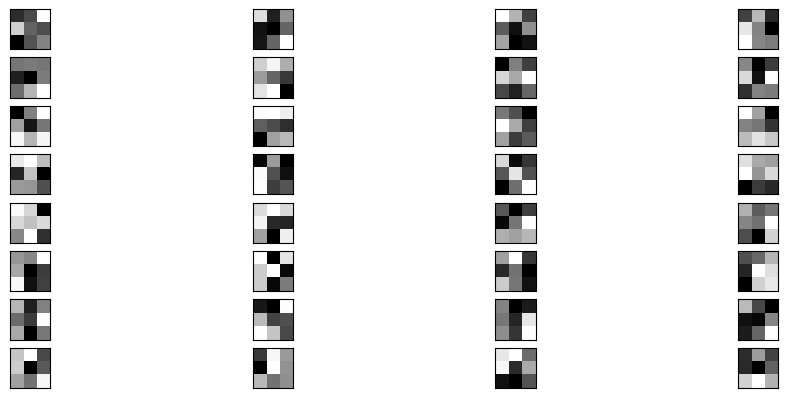

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot first few filters and set plot size
n_filters, ix = 32, 1
plt.figure(figsize=(12,20))

for i in range(n_filters):
  f = filters[:,:,:,i]

  ax = plt.subplot(n_filters, 4, ix)
  ax.set_xticks([])
  ax.set_yticks([])

  plt.imshow(np.squeeze(f, axis=2), cmap='gray_r')
  ix += 1

plt.show()

**Filter Activations**

In [ ]:
from tensorflow.keras.models import Model

layer_outputs = [layer.output for layer in model.layers[:2]]

activation_model = Model(inputs=model.input, outputs=layer_outputs)

In [ ]:
layer_outputs

[<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 24, 24, 64) dtype=float32 (created by layer 'conv2d_1')>]

(-0.5, 27.5, 27.5, -0.5)

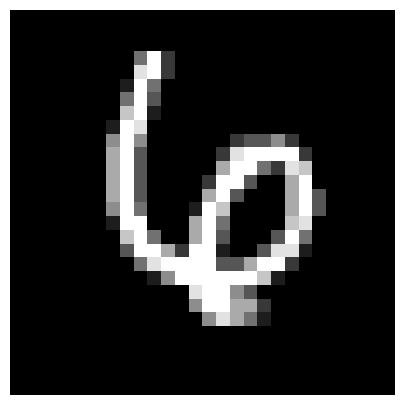

In [ ]:
import matplotlib.pyplot as plt

# Use a random test image
img_tensor = x_test[22].reshape(1, 28, 28, 1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0], cmap='gray')
plt.axis('off')

**Get the output after the 2nd Conv Layer**

In [ ]:
activations = activation_model.predict(img_tensor)

print('Number of layer activations: ', str(len(activations)))

1/1 [==============================] - 0s 137ms/step
Number of layer activations:  2


In [ ]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [ ]:
second_layer_activation = activations[1]
print(second_layer_activation.shape)

(1, 24, 24, 64)


In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

**Output of 4th Conv Filter Feature Map in the first Conv Layer**

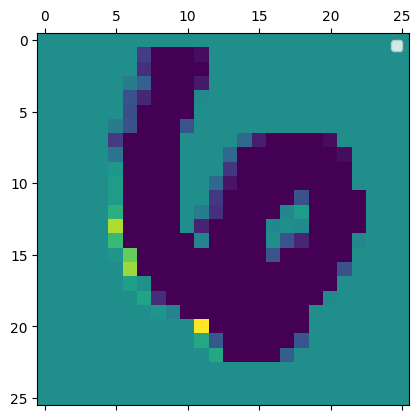

In [ ]:
plt.matshow(first_layer_activation[0,:,:,3], cmap='viridis')
plt.legend()

**Create Functions that displays activation of specific layers**

In [ ]:
def display_activation(activations, col_size, row_size, act_index):
  activation = activations[act_index]
  activation_index=0
  fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5, col_size*1.5))

  for row in range(0, row_size):
    for col in range(0, col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index], cmap='viridis')
      activation_index += 1

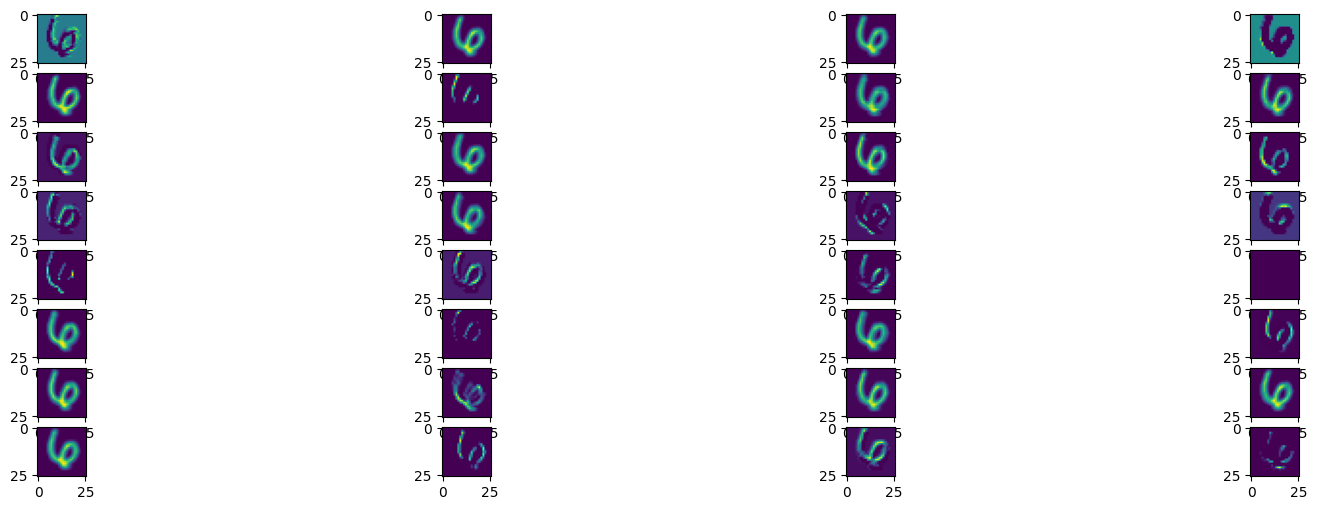

In [ ]:
display_activation(activations, 4, 8, 0)